# MAT281 - Laboratorio N°10



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [54]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




# __Análisis exploratorio de datos__

In [3]:
# resumen de la informacion

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

In [5]:
frames = []

for col in df.columns:
    aux_df = resumen_por_columna(df,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info['% vacios'] = df_info['vacios']/len(df)
df_info

,columna,unicos,vacios,% vacios
0,id,569,0,0.0
1,diagnosis,2,0,0.0
2,radius_mean,456,0,0.0
3,texture_mean,479,0,0.0
4,perimeter_mean,522,0,0.0
5,area_mean,539,0,0.0
6,smoothness_mean,474,0,0.0
7,compactness_mean,537,0,0.0
8,concavity_mean,537,0,0.0
9,concave points_mean,542,0,0.0


# Normalización de las variables numéricas

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = df.columns
df[columns] = scaler.fit_transform(df[columns])

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [12]:
# comprobar resultados del estimador
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,8.877882e-18,1.108857e-15,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,-8.226187e-16,2.419467e-16,-1.315097e-16,-8.780323e-17,...,-7.956924e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.251665e-16,-2.579464e-16,1.143393e-16,3.203842e-16,1.783381e-16,-6.436952e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.430790e-01,-7.706085e-01,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-2.361897e-01,-7.706085e-01,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.358950e-01,-7.706085e-01,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,-1.725930e-01,1.297676e+00,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,7.052629e+00,1.297676e+00,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


# reducción de dimensionalidad

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [36]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [37]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19','PC20','PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29','PC30','PC31','PC32']
)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC1,0.022013,0.216836,0.216404,0.103706,0.224541,0.218007,0.137491,0.231311,0.251115,0.255161,...,0.225597,0.105058,0.233636,0.222022,0.125188,0.204288,0.222927,0.246161,0.120461,0.126524
PC2,-0.032368,-0.077035,-0.226045,-0.058587,-0.207125,-0.222897,0.189042,0.158967,0.068175,-0.026702,...,-0.212408,-0.045164,-0.192094,-0.211595,0.172729,0.148267,0.103591,-0.001785,0.142765,0.276795
PC3,0.097903,-0.104562,-0.000271,0.057256,-0.000892,0.037809,-0.101731,-0.067796,0.009542,-0.019013,...,-0.039210,-0.050352,-0.039889,-0.002394,-0.257203,-0.229456,-0.165984,-0.162802,-0.271611,-0.229383
PC4,0.027300,0.098214,-0.051257,0.599487,-0.052045,-0.061834,-0.149217,-0.040524,-0.028097,-0.070732,...,-0.024516,0.627975,-0.023827,-0.033993,-0.010667,0.075525,0.058062,-0.016847,0.035909,0.067294
PC5,-0.009117,-0.080680,0.042020,-0.020158,0.041831,0.014292,-0.367699,0.017037,0.089721,-0.041380,...,0.001651,-0.060463,0.014025,-0.021243,-0.321004,0.133442,0.197066,0.048980,-0.235423,0.101783
PC6,0.316310,0.005288,-0.029793,0.030418,-0.028623,-0.006413,0.261919,0.004499,0.002251,0.034264,...,-0.004876,0.044032,-0.013302,0.023557,0.364404,-0.034475,-0.018082,0.029356,-0.452128,0.092201
PC7,0.906762,-0.028818,-0.041255,0.019096,-0.042348,-0.027189,-0.137560,-0.042472,-0.031721,-0.080222,...,-0.014912,-0.004676,-0.012529,0.001915,-0.064929,0.053367,0.035847,-0.020216,0.235544,0.036969
PC8,-0.099014,-0.145998,-0.105531,0.018122,-0.094321,-0.035776,-0.099449,0.061094,-0.090455,-0.122745,...,-0.000748,0.025191,0.010757,0.075227,-0.108297,0.142236,-0.061912,-0.158853,-0.041253,0.362993
PC9,-0.150360,0.198361,0.016627,0.061302,0.005334,0.049416,-0.303182,-0.128519,-0.095406,-0.137329,...,0.057153,-0.010226,0.042817,0.080026,0.155876,0.098840,0.027892,-0.057440,0.182309,0.114979
PC10,-0.158620,0.076739,-0.232560,0.100103,-0.235151,-0.198613,-0.056163,-0.200352,0.028392,-0.141259,...,-0.105098,0.097280,-0.104645,-0.071884,0.152487,-0.074612,0.188064,0.054002,0.091539,-0.104132


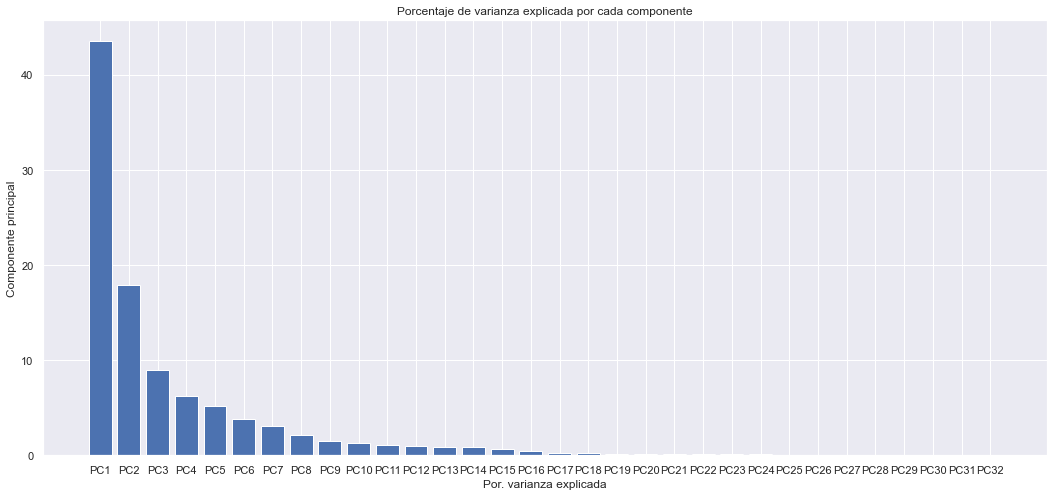

In [35]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19','PC20','PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29','PC30','PC31','PC32']

plt.figure(figsize=(18,8))
plt.bar(x= range(1,33), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

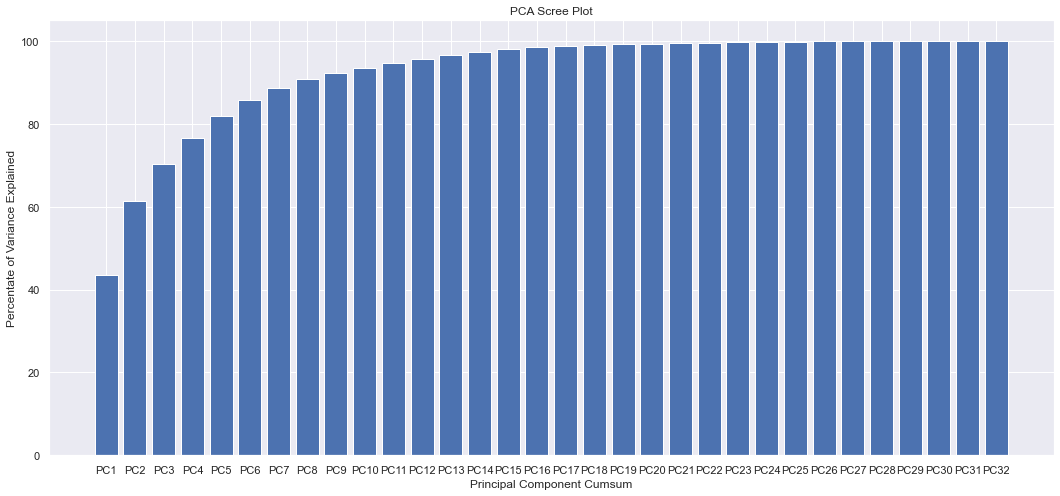

In [39]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19','PC20','PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29','PC30','PC31','PC32']


plt.figure(figsize=(18,8))
plt.bar(x= range(1,33), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [41]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df)
proyecciones = pd.DataFrame(
    proyecciones,
    columns =['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19','PC20','PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29','PC30','PC31','PC32']
,
    index   = df.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,9.216724,2.136750,-0.996666,-3.701989,-1.254759,-1.375762,0.395573,2.211307,-0.160213,-0.060519,...,0.172314,0.082037,0.085714,-0.177079,-0.156238,-0.186689,-0.262740,-0.033102,0.043804,-0.046911
1,2.651244,-3.770741,-0.554319,-1.133416,0.553634,-0.122295,-0.308984,-0.067303,0.560147,-0.608057,...,-0.059225,-0.085470,-0.211720,0.007385,-0.171130,-0.044703,0.181939,0.031930,-0.004078,-0.002272
2,5.900697,-1.010916,-0.467841,-0.933755,-0.194574,-0.402068,0.460244,-0.708040,-0.046968,-0.088025,...,0.206359,-0.049831,-0.073666,0.110708,0.175046,-0.005597,0.045919,0.047545,0.001681,0.001097
3,7.137376,10.315636,-3.256828,-0.053782,-2.944418,-2.566999,1.962902,1.231422,1.311039,-1.197071,...,0.239471,-0.196805,-0.136421,0.162871,0.080311,-0.288804,0.167094,0.042934,-0.070615,-0.019377
4,4.139263,-1.916891,1.465280,-2.877471,0.360750,1.240987,-0.242104,-1.093712,0.713389,-0.156483,...,-0.082677,-0.025528,0.136264,-0.016830,0.001169,0.045126,0.038431,-0.035528,0.007469,0.020662


In [43]:
# Entrenamiento modelo PCA con escalado de los datos proyectados
# ==============================================================================
pca_pipe = make_pipeline(PCA(n_components=8))
pca_pipe.fit(proyecciones)

# Se extrae el modelo entrenado del pipeline
modelo_pca_proyectado = pca_pipe.named_steps['pca']

In [44]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca_proyectado.components_,
    columns = df.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8']
)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC1,1.000000e+00,-9.664263e-18,-3.833370e-16,1.780917e-17,1.422693e-16,-6.488436e-16,-2.396925e-17,-4.678566e-15,-3.333510e-14,-4.290070e-14,...,3.139054e-13,-3.510740e-14,1.149830e-13,1.600359e-14,-1.524019e-14,-1.878393e-17,-1.741096e-16,2.972913e-17,1.215240e-17,-3.213236e-17
PC2,1.590192e-17,1.000000e+00,1.107663e-15,8.844005e-15,-3.694715e-15,8.005157e-14,1.915129e-14,5.263564e-13,3.686450e-12,4.708014e-12,...,-2.257165e-11,7.359920e-13,-1.010022e-11,-1.865412e-12,1.113535e-12,1.070210e-15,2.669451e-14,3.905924e-18,3.104685e-17,9.601615e-17
PC3,3.838852e-16,-1.138017e-15,1.000000e+00,-1.170896e-13,3.947567e-14,-6.947207e-13,-1.631915e-13,-3.814972e-12,-2.539602e-11,-3.231681e-11,...,2.032751e-10,-5.076222e-11,8.548868e-11,1.556574e-11,-1.328837e-11,-4.645168e-14,-1.995491e-13,-8.946365e-17,-5.288610e-17,1.057611e-16
PC4,-1.983662e-17,-8.620048e-15,1.158375e-13,1.000000e+00,1.145659e-12,-1.199696e-11,-1.822572e-12,-5.234848e-11,-3.295238e-10,-4.027103e-10,...,1.412848e-09,5.862599e-11,6.249427e-10,1.233094e-10,-5.921741e-11,5.255481e-13,-1.824317e-12,-3.223435e-16,8.934155e-17,2.289696e-17
PC5,-1.412012e-16,3.584186e-15,-3.877071e-14,-1.137084e-12,1.000000e+00,1.006671e-11,1.534878e-12,3.241662e-11,1.946246e-10,2.383963e-10,...,-6.048919e-10,-8.001089e-10,-2.558796e-10,-9.778893e-11,1.032271e-10,-1.466248e-13,8.018890e-13,-9.289307e-17,1.242684e-17,1.557619e-17
PC6,6.154236e-16,-7.648655e-14,6.719629e-13,1.172942e-11,-9.915770e-12,1.000000e+00,-1.087154e-10,-1.344586e-09,-7.094602e-09,-8.483946e-09,...,3.926408e-08,-1.705388e-10,8.931672e-09,3.462424e-09,-1.292047e-09,1.238706e-12,-3.521654e-11,-1.009664e-14,2.224166e-16,4.940735e-17
PC7,1.400806e-17,-1.801090e-14,1.554970e-13,1.749352e-12,-1.487671e-12,1.070532e-10,1.000000e+00,-5.807190e-10,-2.456900e-09,-3.204711e-09,...,3.833684e-08,-1.105381e-08,-1.721220e-09,-8.450154e-10,-1.960732e-09,-1.025805e-11,-1.372807e-11,2.943746e-15,-3.384949e-16,4.106362e-18
PC8,4.227421e-15,-4.785599e-13,3.510866e-12,4.871424e-11,-3.038378e-11,1.279391e-09,5.608373e-10,1.000000e+00,-1.815390e-07,-1.781364e-07,...,5.218583e-07,-1.474467e-08,1.168412e-07,3.461897e-08,-1.784631e-08,-3.071418e-12,-3.683266e-10,-7.487510e-14,4.328764e-15,-3.634879e-17


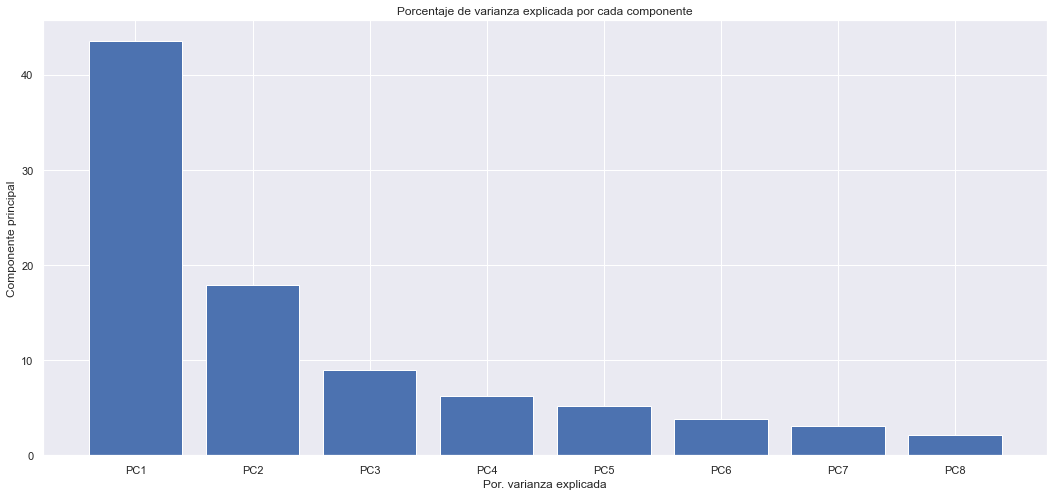

In [45]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca_proyectado.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8']

plt.figure(figsize=(18,8))
plt.bar(x= range(1,9), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca_proyectado.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

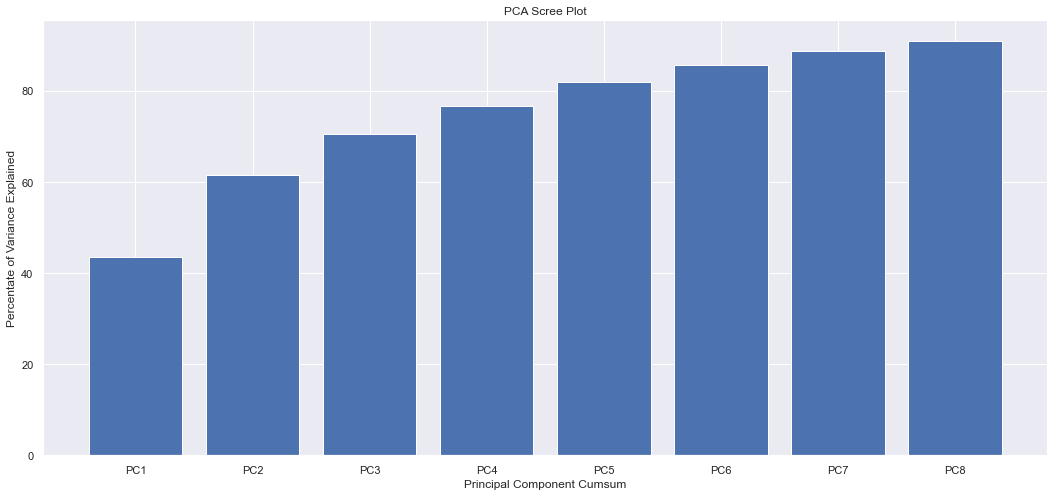

In [47]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8']


plt.figure(figsize=(18,8))
plt.bar(x= range(1,9), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

# modelos de clasificación

In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 


In [60]:

X = df.drop(columns='diagnosis').values
y = df['diagnosis'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando el modelo
rlog = LogisticRegression(solver='lbfgs', max_iter=100)
rlog.fit(X_train, Y_train) # ajustando el modelo



LogisticRegression()

In [65]:
from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(Y_test)
y_pred = list(rlog.predict(X_test))


In [66]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[71  0]
 [43  0]]
